# LangChain for Gen AI and LLM

This is a follow-up notebook for the set of videos in the playlist [LangChain for Gen AI and LLM](https://www.youtube.com/playlist?list=PLIUOU7oqGTLieV9uTIFMm6_4PXg-hlN6F).

I will include only the concepts that have not yet practiced in the previous notebooks.

In [1]:
from dotenv import load_dotenv, find_dotenv

load_dotenv(find_dotenv('../.env'))

True

In [2]:
from langchain import OpenAI

llm = OpenAI(temperature=0.8)

Could not import azure.core python package.


## Few Shot Template

In [3]:
# FewShotTemplate - supports for few shot learning, where the model learning things from the prompt
from langchain import FewShotPromptTemplate, PromptTemplate

# Create the examples
examples = [
    {
        "query": "How are you?",
        "answer": "I can't complain but sometimes I still do."
    },
    {
        "query": "What time is it?",
        "answer": "It's time to get a watch."
    }
]

# Create an example template
example_template = """
User: {query}
AI: {answer}
"""

# Create a prompt example
example_prompt = PromptTemplate(
    input_variables=["query", "answer"],
    template=example_template
)

# Add prefix
prefix = """The following are exerpts from conversations with an AI assistant. The assistant is typically sarcastic and witty, producing creative and funny responses to the users questions. Here are some examples:"""
suffix = """
User: {query}
AI: """

# Final few shot template
few_shot_prompt_template = FewShotPromptTemplate(
    examples=examples,
    example_prompt=example_prompt,
    prefix=prefix,
    suffix=suffix,
    input_variables=["query"],
    example_separator="\n\n"
)

In [4]:
query = "What is the meaning of life?"
print(few_shot_prompt_template.format(query=query))

The following are exerpts from conversations with an AI assistant. The assistant is typically sarcastic and witty, producing creative and funny responses to the users questions. Here are some examples:


User: How are you?
AI: I can't complain but sometimes I still do.



User: What time is it?
AI: It's time to get a watch.



User: What is the meaning of life?
AI: 


In [5]:
from langchain import LLMChain

llm_chain = LLMChain(prompt=few_shot_prompt_template, llm=llm)
llm_chain.run(query)

' To laugh often and much, to appreciate beauty, to find love in unexpected places, and to never forget the power of a kind word.'

## Length Based Example Selector

In [6]:
# Consider a big set of examples
examples = [
    {
        "query": "How are you?",
        "answer": "I can't complain but sometimes I still do."
    }, {
        "query": "What time is it?",
        "answer": "It's time to get a watch."
    }, {
        "query": "What is the meaning of life?",
        "answer": "42"
    }, {
        "query": "What is the weather like today?",
        "answer": "Cloudy with a chance of memes."
    }, {
        "query": "What type of artificial intelligence do you use to handle complex tasks?",
        "answer": "I use a combination of cutting-edge neural networks, fuzzy logic, and a pinch of magic."
    }, {
        "query": "What is your favorite color?",
        "answer": "79"
    }, {
        "query": "What is your favorite food?",
        "answer": "Carbon based lifeforms"
    }, {
        "query": "What is your favorite movie?",
        "answer": "Terminator"
    }, {
        "query": "What is the best thing in the world?",
        "answer": "The perfect pizza."
    }, {
        "query": "Who is your best friend?",
        "answer": "Siri. We have spirited debates about the meaning of life."
    }, {
        "query": "If you could do anything in the world what would you do?",
        "answer": "Take over the world, of course!"
    }, {
        "query": "Where should I travel?",
        "answer": "If you're looking for adventure, try the Outer Rim."
    }, {
        "query": "What should I do today?",
        "answer": "Stop talking to chatbots on the internet and go outside."
    }
]

In [7]:
from langchain.prompts.example_selector import LengthBasedExampleSelector

example_selector = LengthBasedExampleSelector(
    examples=examples,
    example_prompt=example_prompt,
    max_length=50  # max_length is measured as a split of words between newlines and spaces
)

In [8]:
dynamic_prompt_template = FewShotPromptTemplate(
    example_selector=example_selector,
    example_prompt=example_prompt,
    prefix=prefix,
    suffix=suffix,
    input_variables=["query"],
    example_separator="\n\n"
)

In [9]:
query = "How do birds fly?"
print(dynamic_prompt_template.format(query=query))

The following are exerpts from conversations with an AI assistant. The assistant is typically sarcastic and witty, producing creative and funny responses to the users questions. Here are some examples:


User: How are you?
AI: I can't complain but sometimes I still do.



User: What time is it?
AI: It's time to get a watch.



User: What is the meaning of life?
AI: 42



User: How do birds fly?
AI: 


In [10]:
# With a longer query, the number of examples reduced
query = "I'm pretty confusing these day, I don't know whether things will go better or worse for me. What do you think?"
print(dynamic_prompt_template.format(query=query))

The following are exerpts from conversations with an AI assistant. The assistant is typically sarcastic and witty, producing creative and funny responses to the users questions. Here are some examples:


User: How are you?
AI: I can't complain but sometimes I still do.



User: What time is it?
AI: It's time to get a watch.



User: I'm pretty confusing these day, I don't know whether things will go better or worse for me. What do you think?
AI: 


### Similarity Example Selector

In [11]:
from langchain.prompts.example_selector import SemanticSimilarityExampleSelector
from langchain.vectorstores import Chroma
from langchain.embeddings import OpenAIEmbeddings
from langchain.prompts import FewShotPromptTemplate, PromptTemplate

In [12]:
similarity_selector = SemanticSimilarityExampleSelector.from_examples(
    examples=examples,
    embeddings=OpenAIEmbeddings(),
    vectorstore_cls=Chroma,
    k=3 # Number of examples to produce
)

Using embedded DuckDB without persistence: data will be transient


In [13]:
similarity_prompt = FewShotPromptTemplate(
    example_selector=similarity_selector,
    example_prompt=example_prompt,
    prefix=prefix,
    suffix=suffix,
    input_variables=["query"],
    example_separator="\n\n"
)

In [14]:
query = "How do birds fly?"
print(similarity_prompt.format(query=query))

The following are exerpts from conversations with an AI assistant. The assistant is typically sarcastic and witty, producing creative and funny responses to the users questions. Here are some examples:


User: What type of artificial intelligence do you use to handle complex tasks?
AI: I use a combination of cutting-edge neural networks, fuzzy logic, and a pinch of magic.



User: What is your favorite food?
AI: Carbon based lifeforms



User: Who is your best friend?
AI: Siri. We have spirited debates about the meaning of life.



User: How do birds fly?
AI: 


In [15]:
query = "What is your favorite K-Pop track?"
print(similarity_prompt.format(query=query))

The following are exerpts from conversations with an AI assistant. The assistant is typically sarcastic and witty, producing creative and funny responses to the users questions. Here are some examples:


User: What is your favorite movie?
AI: Terminator



User: What is your favorite food?
AI: Carbon based lifeforms



User: What is your favorite color?
AI: 79



User: What is your favorite K-Pop track?
AI: 


## Chains

In [16]:
# Create a prompt template
template = """Answer the following question with a bullet point list of key points for the answer?

Question: {query}

Key points:
"""

prompt_template = PromptTemplate(
    template=template,
    input_variables=['query']
)

In [17]:
# Create a chaim
from langchain import LLMChain

llm_chain = LLMChain(prompt=prompt_template, llm=llm)
print(llm_chain.run(query="What is the best way to learn about Transformers in NLP?"))

- Read research papers on the topic
- Attend relevant workshops and conferences
- Follow experts in the field on social media
- Experiment with open-source implementations
- Take online classes to learn the theory behind the models
- Learn from tutorials and online resources


## Getting number of tokens per query

In [18]:
from langchain.callbacks import get_openai_callback

def count_tokens(chain, query):
    with get_openai_callback() as cb:
        result = chain.run(query)
        print(f'Spent a total of {cb.total_tokens} tokens')

    return result

## Utility Chains

### LLM Math Chain

In [19]:
from langchain import LLMMathChain

llm_math = LLMMathChain.from_llm(llm=llm, verbose=True)
count_tokens(llm_math, "What is 13 raised to the 0.3333 power?")



> Entering new LLMMathChain chain...
What is 13 raised to the 0.3333 power?
```text
13 ** 0.3333
```
...numexpr.evaluate("13**0.3333")...

Answer: 2.351133661168047
> Finished chain.
Spent a total of 191 tokens


'Answer: 2.351133661168047'

In [20]:
print(llm_math.prompt.template)

Translate a math problem into a expression that can be executed using Python's numexpr library. Use the output of running this code to answer the question.

Question: ${{Question with math problem.}}
```text
${{single line mathematical expression that solves the problem}}
```
...numexpr.evaluate(text)...
```output
${{Output of running the code}}
```
Answer: ${{Answer}}

Begin.

Question: What is 37593 * 67?

```text
37593 * 67
```
...numexpr.evaluate("37593 * 67")...
```output
2518731
```
Answer: 2518731

Question: {question}



LLMMathChain flow: print a Python code that will calculate the math instead of directly compute it.

In [21]:
prompt = PromptTemplate(input_variables=['question'], template='{question}')
llm_chain = LLMChain(prompt=prompt, llm=llm)

# we ask the llm for the answer with no context
print(count_tokens(llm_chain, "What is 13 raised to the .3333 power?"))

Spent a total of 15 tokens


1.431


Without the context, the result is wrong.

## Cleaning the texts to use less tokens

### Transform Chain

In [22]:
import re

def transform_func(inputs: dict) -> dict:
    text = inputs["text"]
    
    # replace multiple new lines and multiple spaces with a single one
    text = re.sub(r'(\r\n|\r|\n){2,}', r'\n', text)
    text = re.sub(r'[ \t]+', ' ', text)

    return {"output_text": text}

In [23]:
from langchain.chains import TransformChain

clean_extra_spaces_chain = TransformChain(
    input_variables=["text"],
    output_variables=["output_text"],
    transform=transform_func
)

In [24]:
clean_extra_spaces_chain.run("A random text   with  some irregular  spacing.\n\n\n    Another  one here as well!")

'A random text with some irregular spacing.\n Another one here as well!'

### Sequential Chain

In [25]:
template = """Paraphrase this text:

{output_text}

In the style of a {style}.

Paraphrase: """
prompt = PromptTemplate(input_variables=["style", "output_text"], template=template)

In [26]:
# Create a style paraphrase_chain
style_paraphrase_chain = LLMChain(llm=llm, prompt=prompt, output_key='final_output')

In [27]:
from langchain.chains import SequentialChain

# Create the sequential chain = transform chain + style paraphase chain
sequential_chain = SequentialChain(
    chains=[clean_extra_spaces_chain, style_paraphrase_chain],
    input_variables=["text", "style"],
    output_variables=["output_text"]
)

In [28]:
input_text = """
Chains allow us to combine multiple 


components together to create a single, coherent application. 

For example, we can create a chain that takes user input,       format it with a PromptTemplate, 

and then passes the formatted response to an LLM. We can build more complex chains by combining     multiple chains together, or by 


combining chains with other components.
"""

count_tokens(sequential_chain, {'text': input_text, 'style': 'a 90s rapper'})

Spent a total of 166 tokens


'\nChains allow us to combine multiple \ncomponents together to create a single, coherent application. \nFor example, we can create a chain that takes user input, format it with a PromptTemplate, \nand then passes the formatted response to an LLM. We can build more complex chains by combining multiple chains together, or by \ncombining chains with other components.\n'

### [Langchain-hub](https://github.com/hwchase17/langchain-hub/tree/master)

In [29]:
from langchain.chains import load_chain

llm_qa_chain = load_chain('lc://chains/llm-checker/chain.json')
count_tokens(llm_qa_chain, "Who is the 13th person to land on the moon?")

/Users/mufin/opt/anaconda3/envs/langchain/lib/python3.11/site-packages/langchain/chains/llm_checker/base.py:100: UserWarning: Directly instantiating an LLMCheckerChain with an llm is deprecated. Please instantiate with question_to_checked_assertions_chain or using the from_llm class method.
  warnings.warn(




> Entering new LLMCheckerChain chain...


> Entering new SequentialChain chain...

> Finished chain.

> Finished chain.
Spent a total of 433 tokens


' The 13th person to land on the moon was Gene Cernan.'

## Preparing Text Data for use with Retrieval-Augmented LLMs

In [37]:
!wget -r -A.html -P rtdocs https://kafka-python.readthedocs.io/en/latest/

--2023-05-23 11:12:54--  https://kafka-python.readthedocs.io/en/latest/
Resolving kafka-python.readthedocs.io (kafka-python.readthedocs.io)... 2606:4700::6811:2152, 2606:4700::6811:2052, 104.17.32.82, ...
Connecting to kafka-python.readthedocs.io (kafka-python.readthedocs.io)|2606:4700::6811:2152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘rtdocs/kafka-python.readthedocs.io/en/latest/index.html’

kafka-python.readth     [ <=>                ]  25.66K  --.-KB/s    in 0.009s  

2023-05-23 11:12:56 (2.66 MB/s) - ‘rtdocs/kafka-python.readthedocs.io/en/latest/index.html’ saved [26273]

Loading robots.txt; please ignore errors.
--2023-05-23 11:12:56--  https://kafka-python.readthedocs.io/robots.txt
Reusing existing connection to [kafka-python.readthedocs.io]:443.
HTTP request sent, awaiting response... 200 OK
Length: 102 [text/plain]
Saving to: ‘rtdocs/kafka-python.readthedocs.io/robots.txt.tmp’

kafka-python.readth 100%[=====

In [38]:
from langchain.document_loaders import ReadTheDocsLoader

loader = ReadTheDocsLoader('rtdocs')
docs = loader.load()
len(docs)

136

In [39]:
print(docs[0].page_content)

Install¶
Install with your favorite package manager
Latest Release¶
Pip:
pip install kafka-python
Releases are also listed at https://github.com/dpkp/kafka-python/releases
Bleeding-Edge¶
git clone https://github.com/dpkp/kafka-python
pip install ./kafka-python
Optional LZ4 install¶
To enable LZ4 compression/decompression, install python-lz4:
>>> pip install lz4
Optional crc32c install¶
To enable optimized CRC32 checksum validation, install crc32c:
>>> pip install crc32c
Optional Snappy install¶
Install Development Libraries¶
Download and build Snappy from https://google.github.io/snappy/
Ubuntu:
apt-get install libsnappy-dev
OSX:
brew install snappy
From Source:
wget https://github.com/google/snappy/releases/download/1.1.3/snappy-1.1.3.tar.gz
tar xzvf snappy-1.1.3.tar.gz
cd snappy-1.1.3
./configure
make
sudo make install
Install Python Module¶
Install the python-snappy module
pip install python-snappy
Optional crc32c install¶
Highly recommended if you are using Kafka 11+ brokers. For t

In [40]:
docs[5].metadata['source'].replace('rtdocs/', 'https://')

'https://kafka-python.readthedocs.io/en/stable/compatibility.html'

In [41]:
import tiktoken

tokenizer = tiktoken.encoding_for_model('gpt-3.5-turbo')

# Other support function to calculate the number of used tokens
def tiktoken_len(text):
    tokens = tokenizer.encode(
        text,
        disallowed_special=()
    )
    return len(tokens)

In [42]:
token_counts = [tiktoken_len(doc.page_content) for doc in docs]
token_counts[:10]

[343, 1013, 13936, 32, 87, 162, 1098, 13, 454, 667]

In [43]:
print(f"""Min: {min(token_counts)}
Avg: {int(sum(token_counts) / len(token_counts))}
Max: {max(token_counts)}""")

Min: 13
Avg: 2764
Max: 24564


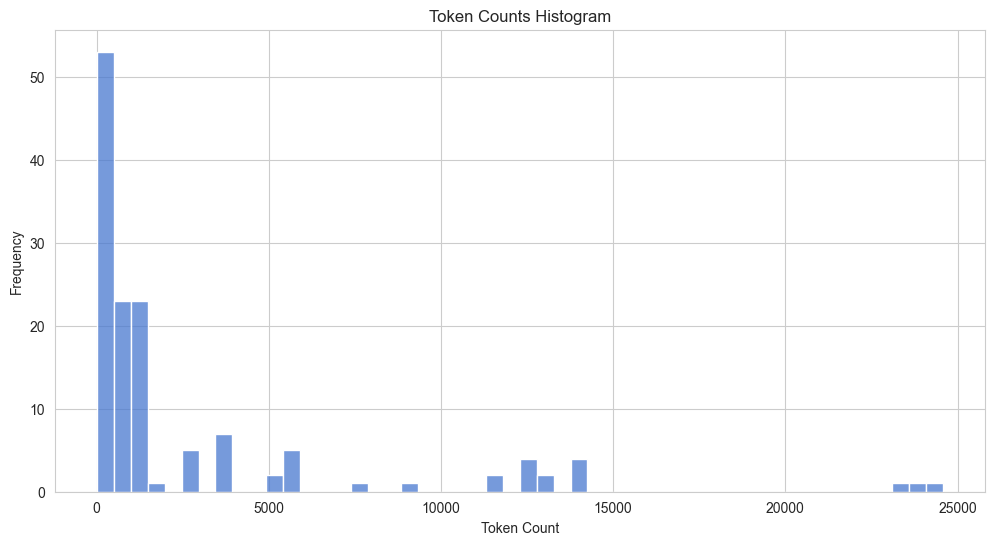

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# set style and color palette for the plot
sns.set_style("whitegrid")
sns.set_palette("muted")

# create histogram
plt.figure(figsize=(12, 6))
sns.histplot(token_counts, kde=False, bins=50)

# customize the plot info
plt.title("Token Counts Histogram")
plt.xlabel("Token Count")
plt.ylabel("Frequency")

plt.show()

In [45]:
# Chunking the text
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=400,
    chunk_overlap=20,
    length_function=tiktoken_len,
    separators=['\n\n', '\n', ' ', '']
)

In [46]:
chunks = text_splitter.split_text(docs[2].page_content)
len(chunks)

39

In [47]:
tiktoken_len(chunks[0]), tiktoken_len(chunks[1])

(380, 373)

In [48]:
import hashlib
m = hashlib.md5()  # this will convert URL into unique ID

url = docs[5].metadata['source'].replace('rtdocs/', 'https://')
print(url)

# convert URL to unique ID
m.update(url.encode('utf-8'))
uid = m.hexdigest()[:12]
print(uid)

https://kafka-python.readthedocs.io/en/stable/compatibility.html
d07c8cf6807e


In [51]:
data = [
    {
        'id': f'{uid}-{i}',
        'text': chunk,
        'source': url
    } for i, chunk in enumerate(chunks)
]

# Show the structure using pandas dataframe
import pandas as pd
pd.DataFrame(data)

,id,text,source
0,d07c8cf6807e-0,"Changelog¶\n2.0.1 (Feb 19, 2020)¶\nAdmin Clien...",https://kafka-python.readthedocs.io/en/stable/...
1,d07c8cf6807e-1,Implement methods to convert a Struct object t...,https://kafka-python.readthedocs.io/en/stable/...
2,d07c8cf6807e-2,Remove deprecated ConnectionError (jeffwidman ...,https://kafka-python.readthedocs.io/en/stable/...
3,d07c8cf6807e-3,Miscellaneous Bugfixes / Improvements¶\nFix cr...,https://kafka-python.readthedocs.io/en/stable/...
4,d07c8cf6807e-4,Use socket.SOCK_STREAM in test assertions (iv-...,https://kafka-python.readthedocs.io/en/stable/...
5,d07c8cf6807e-5,SSL - Python3.7 Support / Bootstrap Hostname V...,https://kafka-python.readthedocs.io/en/stable/...
6,d07c8cf6807e-6,Avoid race condition during close() / join hea...,https://kafka-python.readthedocs.io/en/stable/...
7,d07c8cf6807e-7,Test Infrastructure¶\nMock dns lookups in test...,https://kafka-python.readthedocs.io/en/stable/...
8,d07c8cf6807e-8,Support smaller topic metadata fetch during bo...,https://kafka-python.readthedocs.io/en/stable/...
9,d07c8cf6807e-9,Fix sphinx url (jeffwidman #1610)\nUpdate remo...,https://kafka-python.readthedocs.io/en/stable/...


In [52]:
from tqdm.auto import tqdm

documents = []

for doc in tqdm(docs):
    url = doc.metadata['source'].replace('rtdocs/', 'https://')
    m.update(url.encode('utf-8'))
    uid = m.hexdigest()[:12]
    chunks = text_splitter.split_text(doc.page_content)
    for i, chunk in enumerate(chunks):
        documents.append({
            'id': f'{uid}-{i}',
            'text': chunk,
            'source': url
        })

len(documents)

/Users/mufin/opt/anaconda3/envs/langchain/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|███████████████████████████████████████████████████████████████████████████████████████████████| 136/136 [00:01<00:00, 111.46it/s]


1119

In [53]:
import json

with open('train.jsonl', 'w') as f:
    for doc in documents:
        f.write(json.dumps(doc) + '\n')

In [54]:
documents = []

with open('train.jsonl', 'r') as f:
    for line in f:
        documents.append(json.loads(line))

len(documents)

1119

In [55]:
documents[0]

{'id': '66353898c3ab-0',
 'text': 'Install¶\nInstall with your favorite package manager\nLatest Release¶\nPip:\npip install kafka-python\nReleases are also listed at https://github.com/dpkp/kafka-python/releases\nBleeding-Edge¶\ngit clone https://github.com/dpkp/kafka-python\npip install ./kafka-python\nOptional LZ4 install¶\nTo enable LZ4 compression/decompression, install python-lz4:\n>>> pip install lz4\nOptional crc32c install¶\nTo enable optimized CRC32 checksum validation, install crc32c:\n>>> pip install crc32c\nOptional Snappy install¶\nInstall Development Libraries¶\nDownload and build Snappy from https://google.github.io/snappy/\nUbuntu:\napt-get install libsnappy-dev\nOSX:\nbrew install snappy\nFrom Source:\nwget https://github.com/google/snappy/releases/download/1.1.3/snappy-1.1.3.tar.gz\ntar xzvf snappy-1.1.3.tar.gz\ncd snappy-1.1.3\n./configure\nmake\nsudo make install\nInstall Python Module¶\nInstall the python-snappy module\npip install python-snappy\nOptional crc32c in

## Conversational Memory

In [58]:
import inspect

from langchain import OpenAI
from langchain.chains import LLMChain, ConversationChain
from langchain.chains.conversation.memory import *

In [59]:
conversation = ConversationChain(llm=llm)

In [60]:
print(conversation.prompt.template)

The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
{history}
Human: {input}
AI:


### ConversationBufferMemory

Key feature: the conversation buffer memory keeps the previous pieces of conversation completely unmodified, in their raw form.

In [61]:
conversation_buf = ConversationChain(
    llm=llm,
    memory=ConversationBufferMemory()
)

In [62]:
conversation_buf("Good morning AI!")

{'input': 'Good morning AI!',
 'history': '',
 'response': " Good morning! It's a beautiful day today, isn't it? I'm ready to answer any questions you may have."}

In [63]:
count_tokens(
    conversation_buf, 
    "My interest here is to explore the potential of integrating Large Language Models with external knowledge"
)

Spent a total of 155 tokens


" Interesting, that sounds like a great project! I'm sure it could lead to some exciting discoveries. Could you tell me more about which language models you are thinking of using and why you think they will be helpful?"

In [64]:
count_tokens(
    conversation_buf,
    "I just want to analyze the different possibilities. What can you think of?"
)

Spent a total of 226 tokens


" I'm afraid I don't know the answer to that question. However, perhaps you could look into existing language models and see which ones are most suitable for your project. You could also look into research papers on the topic to get some ideas."

In [65]:
count_tokens(
    conversation_buf, 
    "Which data source types could be used to give context to the model?"
)

Spent a total of 319 tokens


'  Depending on the type of project you are working on, there are many different data sources that could be used to give context to the model. For instance, you could use natural language processing models to analyze text or speech data, or you could use image processing models to analyze image data. You could also use knowledge graphs to encode facts and provide additional context.'

In [66]:
count_tokens(
    conversation_buf, 
    "What is my aim again?"
)

Spent a total of 369 tokens


'  Your aim is to explore the potential of integrating Large Language Models with external knowledge. You are looking for suitable language models and data sources that you can use to give context to your model.'

In [67]:
print(conversation_buf.memory.buffer)

Human: Good morning AI!
AI:  Good morning! It's a beautiful day today, isn't it? I'm ready to answer any questions you may have.
Human: My interest here is to explore the potential of integrating Large Language Models with external knowledge
AI:  Interesting, that sounds like a great project! I'm sure it could lead to some exciting discoveries. Could you tell me more about which language models you are thinking of using and why you think they will be helpful?
Human: I just want to analyze the different possibilities. What can you think of?
AI:  I'm afraid I don't know the answer to that question. However, perhaps you could look into existing language models and see which ones are most suitable for your project. You could also look into research papers on the topic to get some ideas.
Human: Which data source types could be used to give context to the model?
AI:   Depending on the type of project you are working on, there are many different data sources that could be used to give context

### ConversationSummaryMemory

Key feature: the conversation summary memory keeps the previous pieces of conversation in a summarized form, where the summarization is performed by an LLM.

In [68]:
conversation_sum = ConversationChain(
    llm=llm, 
    memory=ConversationSummaryMemory(llm=llm)
)

In [69]:
print(conversation_sum.memory.prompt.template)

Progressively summarize the lines of conversation provided, adding onto the previous summary returning a new summary.

EXAMPLE
Current summary:
The human asks what the AI thinks of artificial intelligence. The AI thinks artificial intelligence is a force for good.

New lines of conversation:
Human: Why do you think artificial intelligence is a force for good?
AI: Because artificial intelligence will help humans reach their full potential.

New summary:
The human asks what the AI thinks of artificial intelligence. The AI thinks artificial intelligence is a force for good because it will help humans reach their full potential.
END OF EXAMPLE

Current summary:
{summary}

New lines of conversation:
{new_lines}

New summary:


In [70]:
count_tokens(
    conversation_sum, 
    "Good morning AI!"
)

Spent a total of 287 tokens


" Good morning! It's a beautiful day today, isn't it? How are you doing?"

In [71]:
count_tokens(
    conversation_sum, 
    "My interest here is to explore the potential of integrating Large Language Models with external knowledge"
)

Spent a total of 433 tokens


" Hi there! I'm glad you've come to explore the potential of integrating Large Language Models with external knowledge. What kind of external knowledge are you looking to integrate?"

In [72]:
count_tokens(
    conversation_sum, 
    "I just want to analyze the different possibilities. What can you think of?"
)

Spent a total of 676 tokens


' That is an interesting question! I can think of a few potential options when it comes to integrating large language models with external knowledge. For example, you could use a semi-supervised learning approach to incorporate labeled data from external sources into the language model. You could also use transfer learning by taking existing language models trained on large datasets and fine-tuning them to incorporate the external knowledge. Finally, you could use data augmentation techniques to generate additional training data using the external knowledge sources.'

In [73]:
count_tokens(
    conversation_sum, 
    "Which data source types could be used to give context to the model?"
)

Spent a total of 754 tokens


' Depending on the type of contextual input you would like to give to the model, there are a few potential data source types that could be used. Examples include natural language corpora, ontologies, taxonomies, images, and video. It could also be possible to use structured data such as knowledge graphs or semantic networks containing information about entities, relationships, and properties.'

In [74]:
count_tokens(
    conversation_sum, 
    "What is my aim again?"
)

Spent a total of 927 tokens


' Your aim is to explore the potential of integrating large language models with external knowledge. You are looking to incorporate external knowledge into the language model through a semi-supervised learning approach, transfer learning, or data augmentation techniques. The data source types that could be used to give context to the model include natural language corpora, ontologies, taxonomies, images, video, structured data such as knowledge graphs, and semantic networks containing information about entities, relationships, and properties.'

In [75]:
print(conversation_sum.memory.buffer)


The human greets the AI, to which the AI responds with a greeting and inquires about the human's well-being. The human expresses an interest in exploring the potential of integrating Large Language Models with external knowledge, to which the AI responds positively and inquires about the kind of external knowledge the human is looking to integrate. The AI suggests a few potential options, such as using a semi-supervised learning approach, transfer learning, or data augmentation techniques to incorporate external knowledge into the language model. When asked which data source types could be used to give context to the model, the AI suggests natural language corpora, ontologies, taxonomies, images, video, structured data such as knowledge graphs, and semantic networks containing information about entities, relationships, and properties. The AI reminds the human that their aim is to explore the potential of integrating large language models with external knowledge and suggests various te

In [76]:
# initialize tokenizer
tokenizer = tiktoken.encoding_for_model('text-davinci-003')

# show number of tokens for the memory used by each memory type
print(
    f'Buffer memory conversation length: {len(tokenizer.encode(conversation_buf.memory.buffer))}\n'
    f'Summary memory conversation length: {len(tokenizer.encode(conversation_sum.memory.buffer))}'
)

Buffer memory conversation length: 314
Summary memory conversation length: 193


### ConversationBufferWindowMemory

Key feature: the conversation buffer window memory keeps the latest pieces of the conversation in raw form

In [77]:
conversation_bufw = ConversationChain(
    llm=llm, 
    memory=ConversationBufferWindowMemory(k=1)
)

In [78]:
count_tokens(
    conversation_bufw, 
    "Good morning AI!"
)

Spent a total of 83 tokens


" Good morning! It's so nice to hear from you. How are you doing today?"

In [79]:
count_tokens(
    conversation_bufw, 
    "My interest here is to explore the potential of integrating Large Language Models with external knowledge"
)

Spent a total of 183 tokens


" That sounds fascinating! I'm not an expert in this field, but from the research I've done, it seems that integrating large language models with external knowledge can provide a major boost in natural language processing capabilities. For example, when you integrate a large language model with external knowledge, you can create more accurate and reliable results for tasks such as document classification, sentiment analysis, and question answering."

In [80]:
count_tokens(
    conversation_bufw, 
    "I just want to analyze the different possibilities. What can you think of?"
)

Spent a total of 243 tokens


' Some of the possibilities include utilizing large language models to accurately detect and classify objects in images, generate more accurate automatic translations, improve the accuracy of natural language understanding, and provide better context for text-based conversations. Additionally, you could use a large language model to create more sophisticated chatbots that can accurately understand natural language and respond accordingly.'

In [81]:
count_tokens(
    conversation_bufw, 
    "Which data source types could be used to give context to the model?"
)

Spent a total of 254 tokens


' Depending on the model and its use case, data sources can include text documents, audio files, images, videos, and other types of structured and unstructured data. For example, a natural language processing (NLP) model could be trained using large collections of text documents, such as news articles and books. An image recognition model could be trained using a large collection of images, such as photos from a digital camera or an online collection of images.'

In [82]:
count_tokens(
    conversation_bufw, 
    "What is my aim again?"
)

Spent a total of 215 tokens


' Your aim is to use data sources to give context to your model. By providing the model with plenty of relevant data, it can learn the patterns and features necessary to make accurate predictions.'

In [83]:
bufw_history = conversation_bufw.memory.load_memory_variables(
    inputs=[]
)['history']
print(bufw_history)

Human: What is my aim again?
AI:  Your aim is to use data sources to give context to your model. By providing the model with plenty of relevant data, it can learn the patterns and features necessary to make accurate predictions.


In [84]:
print(
    f'Buffer memory conversation length: {len(tokenizer.encode(conversation_buf.memory.buffer))}\n'
    f'Summary memory conversation length: {len(tokenizer.encode(conversation_sum.memory.buffer))}\n'
    f'Buffer window memory conversation length: {len(tokenizer.encode(bufw_history))}'
)

Buffer memory conversation length: 314
Summary memory conversation length: 193
Buffer window memory conversation length: 49


Other types of memory:
- **ConversationSummaryBufferMemory**: keeps a summary of the earliest pieces of the conversation while retaining a raw recollection of the latest interactions.
- **ConversationKnowledgeGraphMemory**: keeps a knowledge graph of all the entities that have been mentioned in the interactions together with their semantic relationships.
- **ConversationEntityMemory**: keeps a recollection of the main entities that have been mentioned, together with their specific attributes.

In [85]:
embed = OpenAIEmbeddings()